### Machine Learning FOr Optimizing USA Household Energy Consumption
### Import Library Files

In [116]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [117]:
df = pd.read_csv("electric_consumption_till_25jun.csv")
df

,Unnamed: 0,Date,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_cloudcover,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_visibility,Homestead_winddirDegree,Homestead_windspeedKmph,Consumption
0,0,2020-06-25 17:00:00,33.0,27.0,23.0,36.0,36.0,31.0,24.0,9.0,62.0,0.0,1018.0,31.0,10.0,94.0,19.0,103.0
1,1,2020-06-25 16:00:00,33.0,27.0,23.0,37.0,37.0,32.0,24.0,7.0,60.0,0.0,1018.0,32.0,10.0,96.0,20.0,99.0
2,2,2020-06-25 15:00:00,33.0,27.0,23.0,38.0,38.0,33.0,23.0,5.0,57.0,0.0,1019.0,33.0,10.0,98.0,20.0,74.0
3,3,2020-06-25 14:00:00,33.0,27.0,23.0,37.0,37.0,32.0,22.0,6.0,57.0,0.0,1019.0,32.0,10.0,96.0,19.0,82.0
4,4,2020-06-25 13:00:00,33.0,27.0,23.0,37.0,37.0,32.0,21.0,7.0,58.0,0.0,1019.0,32.0,10.0,95.0,18.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22196,22196,2017-12-11 04:00:00,19.0,9.0,1.0,7.0,10.0,7.0,29.0,0.0,54.0,0.0,1024.0,10.0,10.0,342.0,17.0,46.0
22197,22197,2017-12-11 03:00:00,19.0,9.0,2.0,8.0,10.0,8.0,29.0,0.0,57.0,0.0,1024.0,10.0,10.0,339.0,16.0,52.0
22198,22198,2017-12-11 02:00:00,19.0,9.0,2.0,8.0,10.0,8.0,28.0,0.0,56.0,0.0,1024.0,10.0,10.0,338.0,16.0,55.0
22199,22199,2017-12-11 01:00:00,19.0,9.0,2.0,8.0,10.0,8.0,28.0,0.0,55.0,0.0,1024.0,10.0,10.0,337.0,16.0,56.0


### Dataset Overview 

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22201 entries, 0 to 22200
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               22201 non-null  int64  
 1   Date                     22201 non-null  object 
 2   Homestead_maxtempC       22201 non-null  float64
 3   Homestead_mintempC       22201 non-null  float64
 4   Homestead_DewPointC      22201 non-null  float64
 5   Homestead_FeelsLikeC     22201 non-null  float64
 6   Homestead_HeatIndexC     22201 non-null  float64
 7   Homestead_WindChillC     22201 non-null  float64
 8   Homestead_WindGustKmph   22201 non-null  float64
 9   Homestead_cloudcover     22201 non-null  float64
 10  Homestead_humidity       22201 non-null  float64
 11  Homestead_precipMM       22201 non-null  float64
 12  Homestead_pressure       22201 non-null  float64
 13  Homestead_tempC          22201 non-null  float64
 14  Homestead_visibility  

In [119]:
df.describe()

,Unnamed: 0,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_cloudcover,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_visibility,Homestead_winddirDegree,Homestead_windspeedKmph,Consumption
count,22201.000000,22201.000000,22201.000000,22201.000000,22201.000000,22201.000000,22201.000000,22201.000000,22201.000000,22201.000000,22201.000000,22201.000000,22201.000000,22201.000000,22201.000000,22201.000000,22201.000000
mean,11100.000000,28.470339,22.240304,19.443043,27.301022,27.492365,25.144768,20.192154,36.598802,71.676276,0.074159,1017.191343,25.006892,9.991127,148.367416,13.716184,65.082969
std,6409.020999,3.405816,4.564863,4.575041,5.673199,5.424141,4.377084,8.813887,26.534648,11.891712,0.269757,3.283711,4.369076,1.342065,84.297680,6.480514,18.133028
min,0.000000,15.000000,0.000000,-6.000000,0.000000,5.000000,0.000000,0.000000,0.000000,13.000000,0.000000,1004.000000,0.000000,2.000000,0.000000,0.000000,6.000000
25%,5550.000000,27.000000,20.000000,18.000000,25.000000,25.000000,23.000000,14.000000,14.000000,64.000000,0.000000,1015.000000,23.000000,10.000000,86.000000,9.000000,51.000000
50%,11100.000000,29.000000,23.000000,21.000000,28.000000,28.000000,26.000000,20.000000,32.000000,73.000000,0.000000,1017.000000,26.000000,10.000000,122.000000,13.000000,63.000000
75%,16650.000000,31.000000,26.000000,23.000000,31.000000,31.000000,28.000000,26.000000,57.000000,81.000000,0.000000,1019.000000,28.000000,10.000000,200.000000,18.000000,79.000000
max,22200.000000,35.000000,28.000000,26.000000,39.000000,39.000000,35.000000,63.000000,100.000000,100.000000,7.200000,1029.000000,35.000000,20.000000,360.000000,43.000000,118.000000


### Data Preprocessing

In [120]:
from sklearn.preprocessing import StandardScaler

# Drop the 'Unnamed: 0' column if it is just an index
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for missing or invalid values
missing_summary = df.isnull().sum()


# Handling missing values (if any)
# Option 1: Drop rows with missing values
data = df.dropna()

In [121]:
# Feature scaling
scaler = StandardScaler()
scaled_columns = df.columns.drop(['Date', 'Consumption'])  # Exclude non-numeric columns
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

# Reset index after preprocessing
df = df.reset_index(drop=True)

In [122]:
df

,Date,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_cloudcover,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_visibility,Homestead_winddirDegree,Homestead_windspeedKmph,Consumption
0,2020-06-25 17:00:00,1.330008,1.042704,0.777487,1.533381,1.568511,1.337732,0.432038,-1.040128,-0.813717,-0.274916,0.246269,1.371742,0.006612,-0.644960,0.815357,103.0
1,2020-06-25 16:00:00,1.330008,1.042704,0.777487,1.709652,1.752876,1.566199,0.432038,-1.115503,-0.981906,-0.274916,0.246269,1.600628,0.006612,-0.621234,0.969670,99.0
2,2020-06-25 15:00:00,1.330008,1.042704,0.777487,1.885923,1.937242,1.794667,0.318578,-1.190877,-1.234188,-0.274916,0.550809,1.829515,0.006612,-0.597508,0.969670,74.0
3,2020-06-25 14:00:00,1.330008,1.042704,0.777487,1.709652,1.752876,1.566199,0.205118,-1.153190,-1.234188,-0.274916,0.550809,1.600628,0.006612,-0.621234,0.815357,82.0
4,2020-06-25 13:00:00,1.330008,1.042704,0.777487,1.709652,1.752876,1.566199,0.091658,-1.115503,-1.150094,-0.274916,0.550809,1.600628,0.006612,-0.633097,0.661045,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22196,2017-12-11 04:00:00,-2.780700,-2.900548,-4.031321,-3.578489,-3.224982,-4.145495,0.999337,-1.379315,-1.486470,-0.274916,2.073511,-3.434875,0.006612,2.297061,0.506733,46.0
22197,2017-12-11 03:00:00,-2.780700,-2.900548,-3.812739,-3.402217,-3.224982,-3.917027,0.999337,-1.379315,-1.234188,-0.274916,2.073511,-3.434875,0.006612,2.261472,0.352421,52.0
22198,2017-12-11 02:00:00,-2.780700,-2.900548,-3.812739,-3.402217,-3.224982,-3.917027,0.885877,-1.379315,-1.318282,-0.274916,2.073511,-3.434875,0.006612,2.249609,0.352421,55.0
22199,2017-12-11 01:00:00,-2.780700,-2.900548,-3.812739,-3.402217,-3.224982,-3.917027,0.885877,-1.379315,-1.402376,-0.274916,2.073511,-3.434875,0.006612,2.237746,0.352421,56.0


In [123]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming the dataset is stored in 'df'
# Drop the 'Unnamed: 0' column if it's just an index
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract features from the 'Date' column: year, month, day, and day of week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.weekday

# Drop the 'Date' column as we now have numeric features
df = df.drop(columns=['Date'])

# Create a new target column 'Consumption_Category' based on thresholds
thresholds = [0, 50, 150, float('inf')]  # Example thresholds
labels = ['Low', 'Medium', 'High']  # Example labels

# Binning the 'Consumption' column
df['Consumption_Category'] = pd.cut(df['Consumption'], bins=thresholds, labels=labels, right=False)

# Drop the original 'Consumption' column
df = df.drop(columns=['Consumption'])

# Encode the categorical labels to numerical values
label_encoder = LabelEncoder()
df['Consumption_Category'] = label_encoder.fit_transform(df['Consumption_Category'])

# Feature scaling: Exclude the non-numeric target column ('Consumption_Category') and 'Date' related columns
scaler = StandardScaler()
scaled_columns = df.columns.drop(['Consumption_Category'])
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

# Display the preprocessed data
print("Preprocessing completed! Here are the first few rows of the processed data:\n", df.head())


Preprocessing completed! Here are the first few rows of the processed data:
    Homestead_maxtempC  Homestead_mintempC  Homestead_DewPointC  \
0            1.330008            1.042704             0.777487   
1            1.330008            1.042704             0.777487   
2            1.330008            1.042704             0.777487   
3            1.330008            1.042704             0.777487   
4            1.330008            1.042704             0.777487   

   Homestead_FeelsLikeC  Homestead_HeatIndexC  Homestead_WindChillC  \
0              1.533381              1.568511              1.337732   
1              1.709652              1.752876              1.566199   
2              1.885923              1.937242              1.794667   
3              1.709652              1.752876              1.566199   
4              1.709652              1.752876              1.566199   

   Homestead_WindGustKmph  Homestead_cloudcover  Homestead_humidity  \
0                0.432038   

### Expolatory Data Analysis 

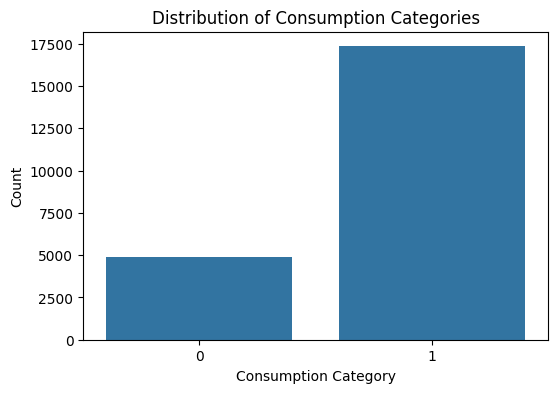

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Consumption_Category', data=df)
plt.title('Distribution of Consumption Categories')
plt.xlabel('Consumption Category')
plt.ylabel('Count')
plt.show()


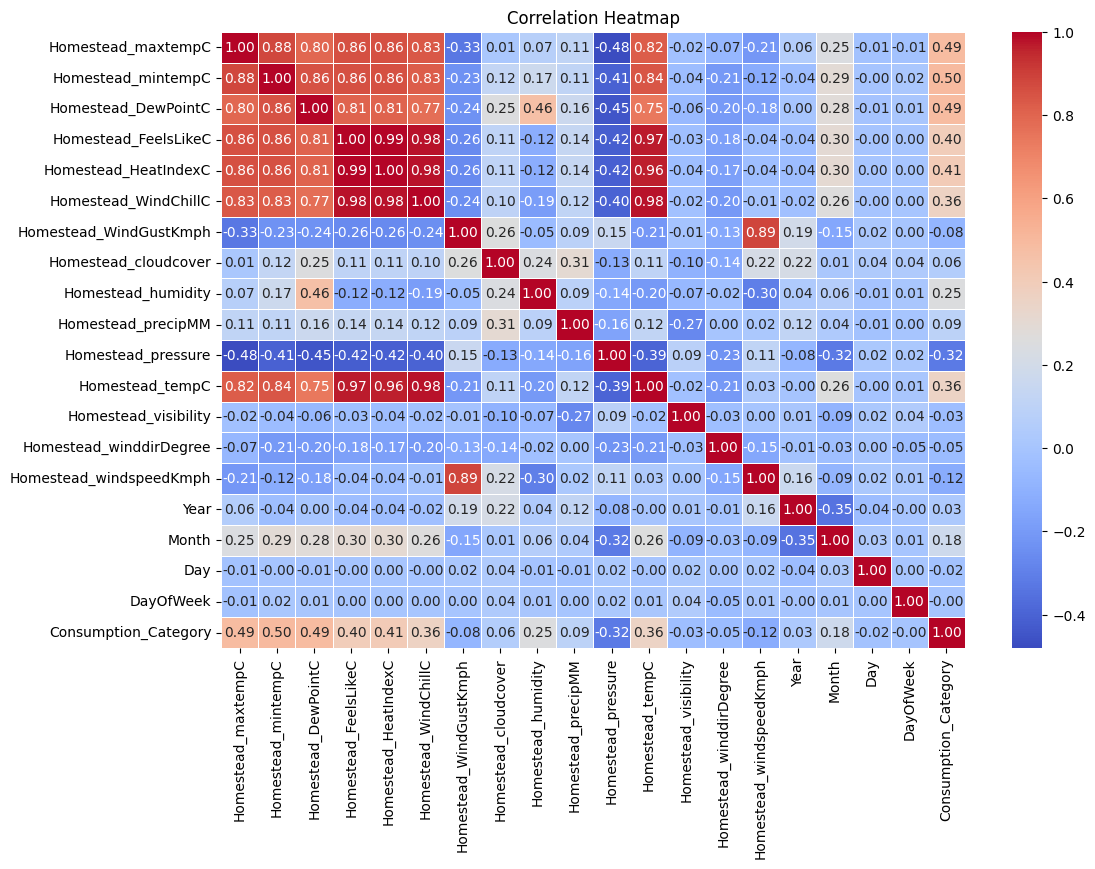

In [125]:
# Compute correlation matrix
corr = df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


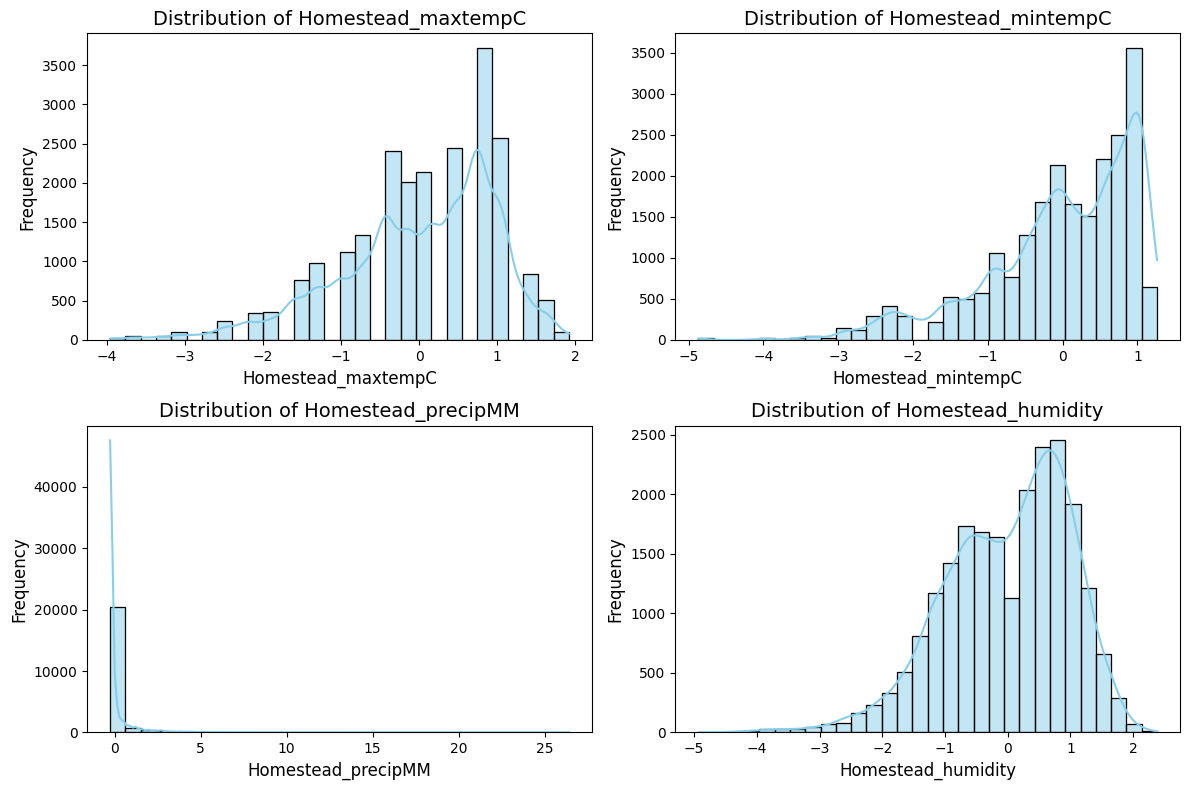

In [126]:
# Select a few important numerical features for distribution visualization
numerical_features = ['Homestead_maxtempC', 'Homestead_mintempC', 'Homestead_precipMM', 'Homestead_humidity']

# Plot distributions of the selected features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_3316\3123893045.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')


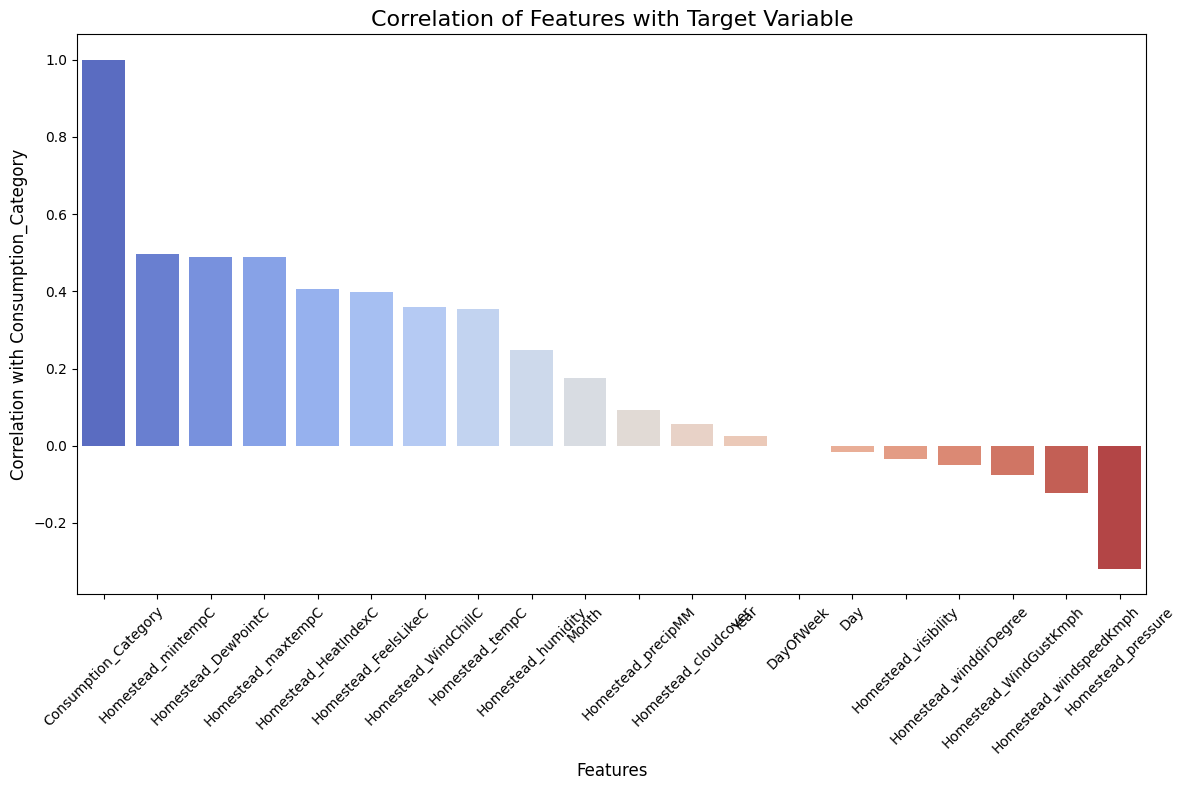

In [127]:
# Plot the correlation of each feature with the target variable
correlation_with_target = df.corr()['Consumption_Category'].sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')
plt.title('Correlation of Features with Target Variable', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation with Consumption_Category', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Models
### Logistic Regression

In [128]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into features and target
X = df.drop(columns=['Consumption_Category'])
y = df['Consumption_Category']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, y_pred))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.54      0.60       980
           1       0.88      0.93      0.90      3461

    accuracy                           0.84      4441
   macro avg       0.78      0.73      0.75      4441
weighted avg       0.84      0.84      0.84      4441

Logistic Regression Accuracy Score: 0.8448547624408916


### Random Forest Classifier

In [129]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy Score:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.78       980
           1       0.93      0.96      0.94      3461

    accuracy                           0.91      4441
   macro avg       0.88      0.85      0.86      4441
weighted avg       0.91      0.91      0.91      4441

Random Forest Accuracy Score: 0.9088043233505967


### Support Vector Machine

In [130]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy Score:", accuracy_score(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.57      0.65       980
           1       0.89      0.95      0.92      3461

    accuracy                           0.86      4441
   macro avg       0.82      0.76      0.78      4441
weighted avg       0.86      0.86      0.86      4441

SVM Accuracy Score: 0.8630938977707724


### Comparison

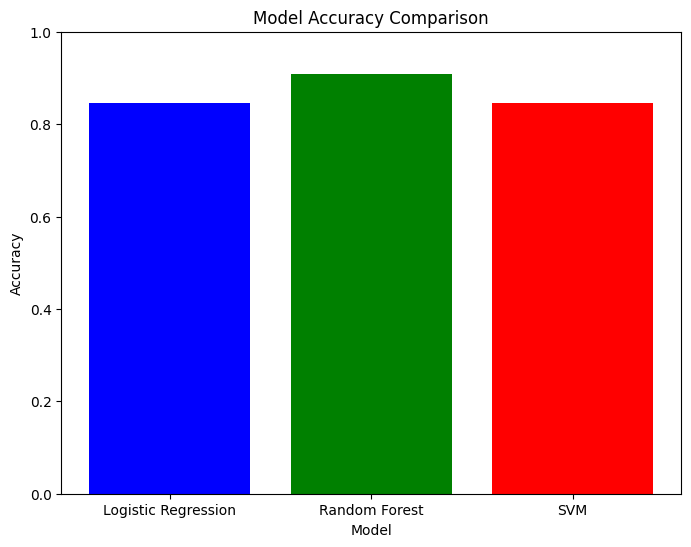

In [131]:
import matplotlib.pyplot as plt

# Store accuracy values for each model
accuracy_values = {
    'Logistic Regression': model_metrics['Logistic Regression']['Accuracy'],
    'Random Forest': model_metrics['Random Forest']['Accuracy'],
    'SVM': model_metrics['SVM']['Accuracy']
}

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.bar(accuracy_values.keys(), accuracy_values.values(), color=['blue', 'green', 'red'])

# Adding labels and title
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Show the plot
plt.show()


### ROC Curve

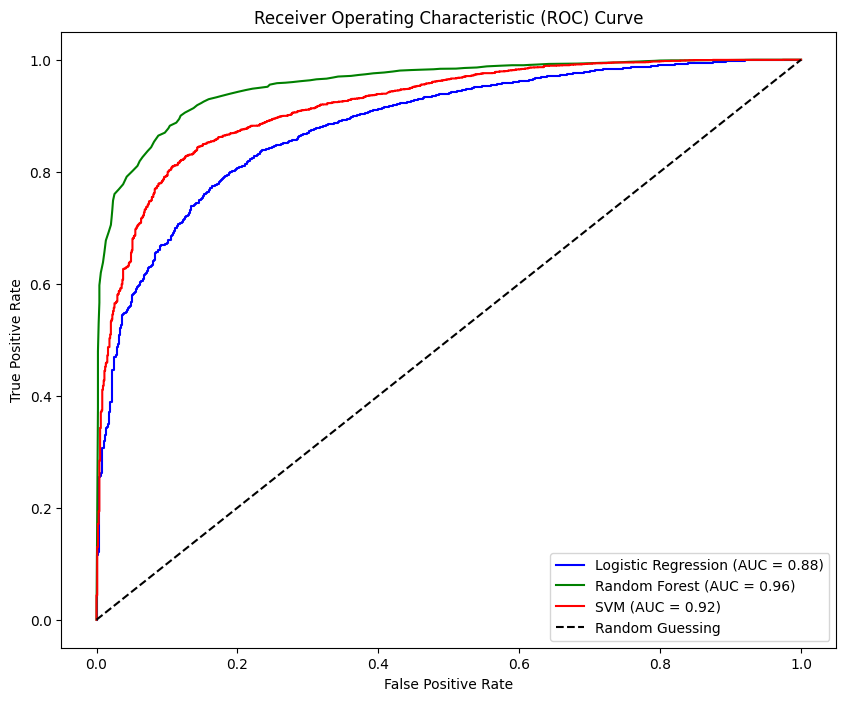

In [132]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC and AUC for each model
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])

# Calculate AUC for each model
auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
auc_rf = auc(fpr_rf, tpr_rf)
auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for all models
plt.figure(figsize=(10, 8))

# Plotting each ROC curve
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', label=f'SVM (AUC = {auc_svm:.2f})')

# Plotting the diagonal line (chance level)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guessing')

# Adding labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()
